In [1]:
import networkx as nx
import string
import matplotlib.pyplot as plt
import osmnx as ox
import pandas as pd

useful_tags_path = ['bridge', 'tunnel', 'oneway', 'lanes', 'ref', 'name', 'length',
                    'highway', 'maxspeed', 'service', 'access', 'area', 'name'
                    'landuse', 'width', 'est_width', 'junction', 'surface', 
                    'traffic_signals', 'crossing', 'railway']

ox.settings.useful_tags_way=useful_tags_path

def generate_streetnetwork():

    """
    Load a network from OSMNX which will be used for the simulation runs. The generated network is from Rotterdam.
    Returns
    -------
    G: network MultiGraph
        Network Graph with different attributes:
            Nodes and Edges with LineString with coordinates,
            Edges have properties Speed, Travel time, Length.

    """
    lonlat=     'Netherlands'                                 #coordinates of the city centre of Rotterdam
    roadtype=   "drive"                                     #select only roads which are driveable by the car.

    # cf = '["highway"~"motorway|motorway_link"]'
    # cf = '["highway"~"primary"]'  # orange roads OSM viewer
    # cf = '["highway"~"motorway|motorway_link|primary|secondary"]'
    cf = '["highway"~"motorway|motorway_link|trunk|trunk_link|primary|secondary|tertiary|residential"]'

    ox.settings.log_console=True
    ox.settings.use_cache=True
    # ox.config(use_cache=True, log_console=True)

    # download street network data from OSM and construct a MultiDiGraph model
    # G = ox.graph_from_address('Emmerich, Germany', dist=10000, simplify=True, custom_filter=cf)
    G = ox.graph_from_address('Utrecht, Netherlands', dist=6500, network_type='drive', simplify=True, custom_filter=cf)

    # G = ox.graph_from_place('Almelo, Netherlands', network_type='drive', simplify=True, custom_filter=cf)

    # default speeds
    hwy_speeds = {'motorway': 100,
                    'trunk': 100,
                    'residential': 30,
                    'tertiary': 30} #etc

    G = ox.add_edge_speeds(G, hwy_speeds=hwy_speeds)
    G = ox.add_edge_travel_times(G, precision=1)

    return G

In [2]:
def save_graph(G):
    filepath=f"graphs/Utrecht.graph.graphml"
    # ox.save_graph_geopackage(G, filepath=filepath)
    ox.save_graphml(G,filepath)

In [3]:
def draw_edges(graph):
    edges_fugitive = []

    # for i_r, route_time in enumerate(fugitive_routes):
    #     route = list(route_time.values())
    #     for i, node in enumerate(route):
    #         if i ==0:
    #             continue
    #         else:
    #             edges_fugitive1 = [(route[i], route[i-1])]
    #             edges_fugitive2 = [(route[i-1], route[i])]
    #             edges_fugitive.extend(tuple(edges_fugitive1))
    #             edges_fugitive.extend(tuple(edges_fugitive2))

    edge_colormap = ['silver'] * len(graph.edges())
    edge_weightmap = [1] * len(graph.edges())
    for index, edge in enumerate(graph.edges()):
        if edge in edges_fugitive:
            edge_colormap[index] = 'tab:orange'
            edge_weightmap[index] = 2

    return edge_colormap, edge_weightmap

In [4]:
# city = ("")
# distance = 2400
#
G=generate_streetnetwork()
# save_graph(G, city, distance)
#
# print(len(G.nodes()))

# show_graph(city, distance)

C:\Users\isvandroffelaa\AppData\Local\Temp\ipykernel_11284\1666626443.py:51: UserWarning: the `precision` parameter is deprecated and will be removed in a future release
  G = ox.add_edge_travel_times(G, precision=1)


In [5]:
save_graph(G)

In [6]:
def show_graph():
    # filepath=f"graphs/FLEE/Graph_FLEE.graph.graphml"
    # G = ox.load_graphml(filepath=filepath)

    config = 3

    edge_colormap, edge_weightmap = draw_edges(G)
    suspect_start = ox.nearest_nodes(G, 5.123583852763527, 52.09520282139232)  # church

    node_size = []
    node_color = []
    for node in G.nodes:
        if node == suspect_start:
            node_size.append(40)
            node_color.append('red')
        else:
            node_size.append(0)
            node_color.append('lightgray')

    fig, ax = ox.plot_graph(
                G, bgcolor="white", node_color=node_color, node_size=node_size, edge_linewidth=edge_weightmap, edge_color=edge_colormap,
                save=True, filepath=f'graphs/prelim_Utrecht.png'
                )
    # ax.savefig('graphs/FLEE/Graph_FLEE.png')

In [7]:
# show_graph()

## Find border nodes

In [8]:
succ_nodes = [a for a in G.succ[10760114232]]

G.nodes()[10760114232]

{'y': 52.0654562, 'x': 5.1258157, 'street_count': 3}

In [9]:
exit_nodes = []
for node in G.nodes():
    # 10760114232
    succ_nodes = [a for a in G.succ[node]]
    succ_nodes_type = [G.succ[node][b][0]['highway'] for b in succ_nodes]
    # [G.succ[10760114232][b][0]['highway'] for b in [a for a in G.succ[10760114232]]]
    
    pred_nodes = [a for a in G.pred[node]]
    pred_nodes_type = [G.pred[node][b][0]['highway'] for b in pred_nodes]
    # [G.pred[10760114232][b][0]['highway'] for b in [a for a in G.pred[10760114232]]]
    
    total_nodes_type = succ_nodes_type + pred_nodes_type
    
    if 'motorway' in total_nodes_type and any([x != 'motorway' or 'trunk' for x in pred_nodes_type]):
        exit_nodes.append(node)
        
exit_nodes

[45013714,
 45042037,
 45045430,
 45045872,
 45046717,
 45047144,
 45047888,
 45048470,
 45049287,
 45049391,
 45049972,
 45058506,
 45059676,
 45060289,
 45061179,
 45065508,
 45066459,
 45066837,
 45068410,
 45068836,
 45071569,
 45071649,
 45074987,
 45075353,
 45075446,
 45076761,
 45076819,
 45079437,
 45079680,
 45082439,
 45084499,
 45088344,
 45090399,
 45091488,
 45094771,
 45098337,
 45099501,
 45100185,
 45107138,
 45107166,
 45114029,
 45116561,
 45119030,
 45120960,
 45121278,
 45123784,
 45143438,
 45143808,
 45191116,
 45199133,
 45200164,
 45204186,
 45206298,
 45207616,
 45209168,
 45209575,
 45210382,
 45210477,
 45210786,
 45212197,
 45212382,
 45212972,
 45213474,
 45215582,
 45241242,
 45242848,
 45273172,
 45285277,
 45298460,
 45311804,
 45321777,
 45354513,
 45367231,
 45373706,
 45387075,
 45394806,
 45411803,
 45415789,
 45451318,
 208489782,
 248966730,
 323680817,
 365559407,
 534911416,
 571462019,
 571464687,
 588133326,
 588133328,
 719146579,
 840840810,

In [10]:
len(exit_nodes)

103

In [11]:
trunk_nodes = []
for node in G.nodes():
    # 10760114232
    succ_nodes = [a for a in G.succ[node]]
    succ_nodes_type = [G.succ[node][b][0]['highway'] for b in succ_nodes]
    # [G.succ[10760114232][b][0]['highway'] for b in [a for a in G.succ[10760114232]]]
    
    pred_nodes = [a for a in G.pred[node]]
    pred_nodes_type = [G.pred[node][b][0]['highway'] for b in pred_nodes]
    # [G.pred[10760114232][b][0]['highway'] for b in [a for a in G.pred[10760114232]]]
    
    total_nodes_type = succ_nodes_type + pred_nodes_type
    
    if 'trunk_link' in total_nodes_type:
        trunk_nodes.append(node)
        
len(trunk_nodes)

45

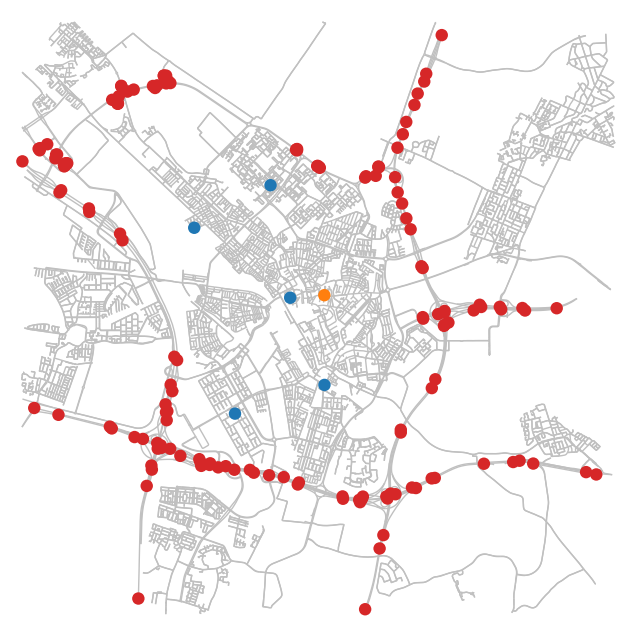

In [36]:
import pickle
def show_graph(G, exit_nodes):
    # filepath=f"graphs/FLEE/Graph_FLEE.graph.graphml"
    # G = ox.load_graphml(filepath=filepath)

    config = 3

    edge_colormap, edge_weightmap = draw_edges(G)
    suspect_start = ox.nearest_nodes(G, 5.123583852763527, 52.09520282139232)  # church

    with open(f'data/optimization/start_police_Utrecht.pkl', 'rb') as f:
        police_start = pickle.load(f)
    
    node_size = []
    node_color = []
    for node in G.nodes:
        if node == suspect_start:
            node_size.append(80)
            node_color.append('tab:orange')
        elif node in exit_nodes:
            node_size.append(80)
            node_color.append('tab:red')
        elif node in police_start:
            node_size.append(80)
            node_color.append('tab:blue')
        elif node in trunk_nodes:
            node_size.append(80)
            node_color.append('tab:red')
        else:
            node_size.append(0)
            node_color.append('silver')

    fig, ax = ox.plot_graph(
                G, bgcolor="white", node_color=node_color, node_size=node_size, edge_linewidth=edge_weightmap, edge_color=edge_colormap,
                # save=True, filepath=f'graphs/Utrecht.png'
                )
    fig.savefig('graphs/Utrecht.png', bbox_inches='tight', dpi=300)
    plt.show()
    
show_graph(G, exit_nodes)

In [37]:
import pickle
escape_nodes = list(set(exit_nodes).union(set(trunk_nodes)))
with open('data/escape_nodes_Utrecht.pkl', 'wb') as f: 
    pickle.dump(escape_nodes, f)

suspect_start = ox.nearest_nodes(G, 5.123583852763527, 52.09520282139232)
with open('data/fugitive_start_Utrecht.pkl', 'wb') as f: 
    pickle.dump(suspect_start, f)

In [38]:
import geopandas as gpd
import shapely

filepath=f"graphs/Utrecht.graph.graphml"
G = ox.load_graphml(filepath=filepath)

In [39]:
nodes_gdf, streets = ox.graph_to_gdfs(G, nodes=True, edges=True,
                            node_geometry=False, fill_edge_geometry=True)
streets = streets.to_crs(4326)
streets

osmid  oneway              name  \
u           v           key                                         
7537119     1088170998  0       7011033    True       Bleekstraat   
            634362565   0      37036411    True       Bleekstraat   
1088170998  45158328    0      44507322    True  Catharijnesingel   
634362565   1088170998  0      93710729    True  Catharijnesingel   
            45157608    0      93710724    True       Bleekstraat   
...                                 ...     ...               ...   
11417206449 1411682530  0    1231088131    True      Plutoniumweg   
            11417206453 0    1231088132    True               NaN   
11417206467 11417206468 0    1231088142    True               NaN   
            1411682529  0    1231088143    True     Soestwetering   
11598359791 11598359782 0      74696941   False     Acapulcodreef   

                                   highway maxspeed  surface reversed  \
u           v           key                                             
7537119     1088170998  0         tertiary       50  asphalt    False   
            634362565   0         tertiary       50  asphalt    False   
1088170998  45158328    0         tertiary       50  asphalt    False   
634362565   1088170998  0         tertiary       50  asphalt    False   
            45157608    0         tertiary       50  asphalt    False   
...                                    ...      ...      ...      ...   
11417206449 1411682530  0          primary       50  asphalt    False   
            11417206453 0    motorway_link       50  asphalt    False   
11417206467 11417206468 0    motorway_link       50  asphalt    False   
            1411682529  0          primary       50  asphalt    False   
11598359791 11598359782 0      residential       30      NaN     True   

                              length  \
u           v           key            
7537119     1088170998  0     17.431   
            634362565   0     14.273   
1088170998  45158328    0     34.695   
634362565   1088170998  0      8.170   
            45157608    0     21.279   
...                              ...   
11417206449 1411682530  0     25.600   
            11417206453 0     22.223   
11417206467 11417206468 0     16.248   
            1411682529  0     17.651   
11598359791 11598359782 0    173.515   

                                                                      geometry  \
u           v           key                                                      
7537119     1088170998  0    LINESTRING (5.12169 52.08020, 5.12178 52.08029...   
            634362565   0    LINESTRING (5.12169 52.08020, 5.12172 52.08029...   
1088170998  45158328    0    LINESTRING (5.12184 52.08033, 5.12185 52.08034...   
634362565   1088170998  0      LINESTRING (5.12172 52.08033, 5.12184 52.08033)   
            45157608    0    LINESTRING (5.12172 52.08033, 5.12168 52.08037...   
...                                                                        ...   
11417206449 1411682530  0      LINESTRING (5.05317 52.11024, 5.05337 52.11043)   
            11417206453 0      LINESTRING (5.05317 52.11024, 5.05314 52.11044)   
11417206467 11417206468 0      LINESTRING (5.05196 52.10941, 5.05201 52.10927)   
            1411682529  0      LINESTRING (5.05196 52.10941, 5.05183 52.10928)   
11598359791 11598359782 0    LINESTRING (5.09219 52.12372, 5.09231 52.12366...   

                             speed_kph  travel_time index_right access lanes  \
u           v           key                                                    
7537119     1088170998  0         50.0          1.3           0    NaN   NaN   
            634362565   0         50.0          1.0           0    NaN   NaN   
1088170998  45158328    0         50.0          2.5           0    NaN   NaN   
634362565   1088170998  0         50.0          0.6           0    NaN   NaN   
            45157608    0         50.0          1.5           0    NaN   NaN   
...                                ...

In [40]:
# import geopackage file in geopandas
nld = gpd.read_file("geodata/Utrecht.geojson", layer=0)
# nld = gpd.read_file("graphs/FLEE/Netherlands_shapefile/nl_1km.shp")
nld = nld.to_crs(4326)
nld

,geometry
0,"POLYGON ((5.02911 52.12095, 5.02691 52.11915, ..."


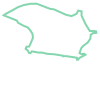

In [41]:
multiLines = shapely.geometry.MultiLineString([x.exterior for x in nld.geometry])
multiLines

In [42]:
lines = streets.geometry.unary_union
intersection = lines.intersection(nld.geometry[0])
# [p for p in intersection.geoms]
type(intersection)

shapely.geometry.multilinestring.MultiLineString

In [43]:
intersectionn = gpd.sjoin(streets, nld)

ValueError: 'index_left' and 'index_right' cannot be names in the frames being joined

<Axes: >

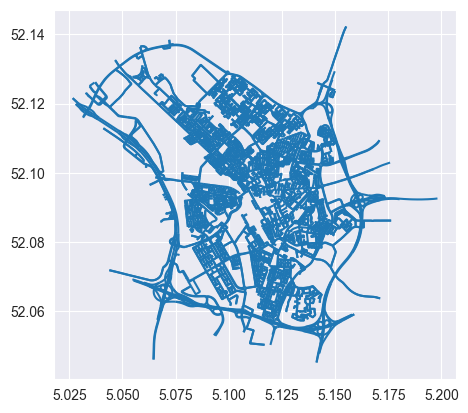

In [44]:
intersectionn.plot()

In [45]:
intersectionn

osmid  oneway  \
u           v           key                                    
7537119     1088170998  0                    7011033    True   
            634362565   0                   37036411    True   
7785429     3212558320  0                    7057704   False   
            45208448    0                  579301920    True   
            45202782    0     [728017541, 712217015]   False   
...                                              ...     ...   
11598271862 45326241    0    [1247649312, 844560642]   False   
11598359782 882368821   0                   74696937   False   
            45342709    0                   74696937   False   
            11598359791 0                   74696941   False   
11598359791 11598359782 0                   74696941   False   

                                          name      highway maxspeed  \
u           v           key                                            
7537119     1088170998  0          Bleekstraat     tertiary       50   
            634362565   0          Bleekstraat     tertiary       50   
7785429     3212558320  0           Leidsekade  residential      NaN   
            45208448    0            Damstraat     tertiary       30   
            45202782    0            Damstraat     tertiary       30   
...                                        ...          ...      ...   
11598271862 45326241    0    Brandenburchdreef  residential       30   
11598359782 882368821   0                  NaN  residential       30   
            45342709    0                  NaN  residential       30   
            11598359791 0        Acapulcodreef  residential       30   
11598359791 11598359782 0        Acapulcodreef  residential       30   

                                   surface reversed   length  \
u           v           key                                    
7537119     1088170998  0          asphalt    False   17.431   
            634362565   0          asphalt    False   14.273   
7785429     3212558320  0    paving_stones     True   51.488   
            45208448    0          asphalt    False  121.456   
            45202782    0          asphalt     True   30.382   
...                                    ...      ...      ...   
11598271862 45326241    0              NaN     True  138.064   
11598359782 882368821   0              NaN    False   22.824   
            45342709    0              NaN     True    8.280   
            11598359791 0              NaN    False  173.515   
11598359791 11598359782 0              NaN     True  173.515   

                                                                      geometry  \
u           v           key                                                      
7537119     1088170998  0    LINESTRING (5.12169 52.08020, 5.12178 52.08029...   
            634362565   0    LINESTRING (5.12169 52.08020, 5.12172 52.08029...   
7785429     3212558320  0    LINESTRING (5.10426 52.09059, 5.10436 52.09062...   
            45208448    0    LINESTRING (5.10426 52.09059, 5.10423 52.09066...   
            45202782    0    LINESTRING (5.10426 52.09059, 5.10428 52.09051...   
...                                                                        ...   
11598271862 45326241    0    LINESTRING (5.12188 52.11979, 5.12172 52.11966...   
11598359782 882368821   0      LINESTRING (5.09087 52.12250, 5.09113 52.12238)   
            45342709    0      LINESTRING (5.09087 52.12250, 5.09077 52.12254)   
            11598359791 0    LINESTRING (5.09087 52.12250, 5.09137 52.12290...   
11598359791 11598359782 0    LINESTRING (5.09219 52.12372, 5.09231 52.12366...   

                             speed_kph  travel_time lanes bridge width access  \
u           v           key                                                     
7537119     1088170998  0         50.0          1.3   NaN    NaN   NaN    NaN   
            634362565   0         50.0          1.0   NaN    NaN   NaN    NaN   
7785429     3212558320  0         30.0          6.2  

In [46]:
unique_osmids_u = list(intersectionn.index.unique(level=0))
unique_osmids_v = list(intersectionn.index.unique(level=1))
unique_osmids = list(set(unique_osmids_u) | set(unique_osmids_v))
# nodes_gdf.iloc[unique_osmids]
nodes_gdf_intersection = nodes_gdf[nodes_gdf.index.isin(unique_osmids)]

In [47]:
len(unique_osmids)

4557

In [48]:
nodes_gdf_intersection

,y,x,highway,street_count,ref
osmid,,,,,
7537119,52.080200,5.121694,crossing,3,NaN
1088170998,52.080329,5.121837,NaN,3,NaN
634362565,52.080327,5.121717,NaN,6,NaN
7785429,52.090593,5.104264,NaN,3,NaN
3212558320,52.090789,5.104947,NaN,1,NaN
...,...,...,...,...,...
11085659694,52.105209,5.092251,NaN,4,NaN
11295441538,52.123167,5.032830,NaN,3,NaN
11417206449,52.110240,5.053166,NaN,3,NaN


In [49]:
G_intersection = ox.graph_from_gdfs(nodes_gdf_intersection, intersectionn)

In [50]:
len(G_intersection.nodes())

4557

In [51]:
save_graph(G_intersection)

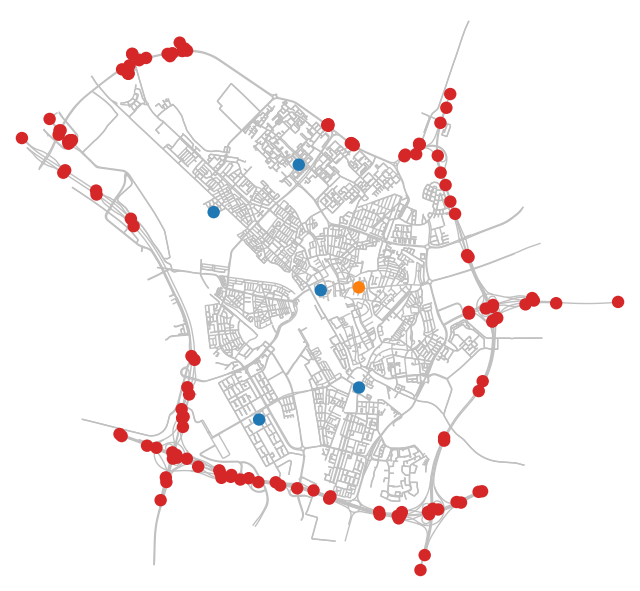

In [52]:
show_graph(G=G_intersection, exit_nodes=exit_nodes)

# Cameras

In [29]:
cameras_df = pd.read_csv('data/cameraregister-utrecht.csv')
cameras_df.rename(columns={'Locatie (GPS Longtitude)': 'Longitude', 'Locatie (GPS Latitude)': 'Latitude'}, inplace=True)

In [30]:
lats = []
lons = []
for n, data in G.nodes(data=True):
    lats.append(data['y'])
    lons.append(data['x'])
    
lons

[5.1216944,
 5.1042635,
 5.1133518,
 5.0846025,
 5.1182016,
 5.1257039,
 5.1043547,
 5.1045149,
 5.1170477,
 5.1147274,
 5.1140706,
 5.0924542,
 5.1208703,
 5.1303595,
 5.1273081,
 5.1269568,
 5.1272861,
 5.1190734,
 5.1250196,
 5.0980081,
 5.1016932,
 5.0872875,
 5.0930886,
 5.1119955,
 5.113063,
 5.1074727,
 5.1177602,
 5.08403,
 5.0835215,
 5.1836916,
 5.0851308,
 5.0837984,
 5.184108,
 5.0724626,
 5.072684,
 5.0729088,
 5.0860938,
 5.0854132,
 5.0834482,
 5.0839726,
 5.0844373,
 5.106355,
 5.1844253,
 5.0836353,
 5.1039058,
 5.1037106,
 5.0831398,
 5.0818209,
 5.083365,
 5.0693391,
 5.1373904,
 5.0848872,
 5.0727447,
 5.0729725,
 5.0820593,
 5.0725181,
 5.0774802,
 5.0770202,
 5.0804075,
 5.0770229,
 5.0791994,
 5.0756546,
 5.0823567,
 5.1040887,
 5.0806283,
 5.0826424,
 5.0795564,
 5.0796367,
 5.0791742,
 5.068541,
 5.1445158,
 5.0809313,
 5.0685732,
 5.1436496,
 5.0828931,
 5.1711317,
 5.1676479,
 5.0810477,
 5.0699532,
 5.0799906,
 5.0687018,
 5.0812242,
 5.1713007,
 5.080038,
 

In [31]:
#delete the cameras that are outside the bounding box
for index, row in cameras_df.iterrows():
    if float(row['Latitude']) < min(lats) or float(row['Latitude']) > max(lats):
        cameras_df = cameras_df.drop(index)
    elif float(row['Longitude']) < min(lons)  or float(row['Longitude']) > max(lons):
        cameras_df = cameras_df.drop(index)

In [32]:
cameras = []
for index, row in cameras_df.iterrows():
    if row['Tijdigheid camera'] == 'Tijdelijk':
        cameras_df = cameras_df.drop(index)
        continue
    if row['Doel van de camera'] != 'Openbare Orde & Veiligheid':
        continue
        
    lat = float(row['Latitude'])
    lon = float(row['Longitude'])
    closest_node = ox.nearest_nodes(G, lon, lat)
    cameras.append(closest_node)
    
cameras = list(set(cameras))

In [33]:
len(cameras)

58

In [34]:
cameras_df = pd.read_csv('data/cameraplan.csv')

In [35]:
lats = []
lons = []
for n, data in G.nodes(data=True):
    lats.append(data['y'])
    lons.append(data['x'])
    
lons

[5.1216944,
 5.1042635,
 5.1133518,
 5.0846025,
 5.1182016,
 5.1257039,
 5.1043547,
 5.1045149,
 5.1170477,
 5.1147274,
 5.1140706,
 5.0924542,
 5.1208703,
 5.1303595,
 5.1273081,
 5.1269568,
 5.1272861,
 5.1190734,
 5.1250196,
 5.0980081,
 5.1016932,
 5.0872875,
 5.0930886,
 5.1119955,
 5.113063,
 5.1074727,
 5.1177602,
 5.08403,
 5.0835215,
 5.1836916,
 5.0851308,
 5.0837984,
 5.184108,
 5.0724626,
 5.072684,
 5.0729088,
 5.0860938,
 5.0854132,
 5.0834482,
 5.0839726,
 5.0844373,
 5.106355,
 5.1844253,
 5.0836353,
 5.1039058,
 5.1037106,
 5.0831398,
 5.0818209,
 5.083365,
 5.0693391,
 5.1373904,
 5.0848872,
 5.0727447,
 5.0729725,
 5.0820593,
 5.0725181,
 5.0774802,
 5.0770202,
 5.0804075,
 5.0770229,
 5.0791994,
 5.0756546,
 5.0823567,
 5.1040887,
 5.0806283,
 5.0826424,
 5.0795564,
 5.0796367,
 5.0791742,
 5.068541,
 5.1445158,
 5.0809313,
 5.0685732,
 5.1436496,
 5.0828931,
 5.1711317,
 5.1676479,
 5.0810477,
 5.0699532,
 5.0799906,
 5.0687018,
 5.0812242,
 5.1713007,
 5.080038,
 

In [36]:
#delete the cameras that are outside the bounding box
for index, row in cameras_df.iterrows():
    if float(row['Latitude']) < min(lats) or float(row['Latitude']) > max(lats):
        cameras_df = cameras_df.drop(index)
    elif float(row['Longitude']) < min(lons)  or float(row['Longitude']) > max(lons):
        cameras_df = cameras_df.drop(index)

In [37]:
# cameras = []
for index, row in cameras_df.iterrows():
      
    lat = float(row['Latitude'])
    lon = float(row['Longitude'])
    closest_node = ox.nearest_nodes(G, lon, lat)
    cameras.append(closest_node)
    
cameras = list(set(cameras))

In [38]:
len(cameras)

60

In [39]:
with open('data/cameras_Utrecht.pkl', 'wb') as f: 
    pickle.dump(cameras, f)